In [30]:
from fastai.vision import *
from fastai.widgets import *

# Image classifier DNN (Counter Stirke vs Call Of Duty)

Downloading data

In [6]:
path = Path('/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/data')
path_cs = path/'cs'
path_cod = path/'cod'


In [8]:
path_cs.mkdir(parents = True, exist_ok = True)
path_cod.mkdir(parents = True, exist_ok = True)

In [9]:
download_images(path/'cod.txt', path_cod)
download_images(path/'cs.txt', path_cs)


Error https://i0.wp.com/evilsourcegaming.com/wp-content/uploads/2015/06/Black_Ops_3_Evac_Beware_of_Blast_WM_50.jpg HTTPSConnectionPool(host='i0.wp.com', port=443): Read timed out. (read timeout=4)
Error https://i0.wp.com/evilsourcegaming.com/wp-content/uploads/2015/06/Black_Ops_3_Evac_Beware_of_Blast_WM_50.jpg HTTPSConnectionPool(host='i0.wp.com', port=443): Read timed out. (read timeout=4)


Error http://static2.iphonecake.com/appcake/appimg2/1203/505522871-2.jpg HTTPConnectionPool(host='static2.iphonecake.com', port=80): Max retries exceeded with url: /appcake/appimg2/1203/505522871-2.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f85a8ce0390>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://gamers-underground.com/filedata/fetch?id=644191 HTTPSConnectionPool(host='gamers-underground.com', port=443): Read timed out. (read timeout=4)
Error https://gamefabrique.com/storage/screenshots/pc/counter-strike-02.png HTTPSConnectionPool(host='gamefabrique.com', port=443): Max retries exceeded with url: /storage/screenshots/pc/counter-strike-02.png (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://games4win.com/up/counter-strike-01.png HTTPSConnectionPool(host='games4win.com', port=443): Max retries excee

In [10]:
verify_images(path_cod, delete = True)
verify_images(path_cs, delete = True)

cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000102.jpg'>
Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000064.png has 4 instead of 3 channels
Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000317.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000347.jpg'>
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000361.jpg'>
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cod/00000049.jpg'>
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterSt

Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000102.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000308.jpg'>
Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000246.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000315.jpeg'>
cannot identify image file <_io.BufferedReader name='/home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000382.jpg'>
Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000181.jpg has 4 instead of 3 channels
Image /home/louis/Documents/github/FastAIDLproj/ImageClassification/CounterStrikeVsCod/cs/00000349.png has 4 instead of 3 channels
Image /home/louis/D

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

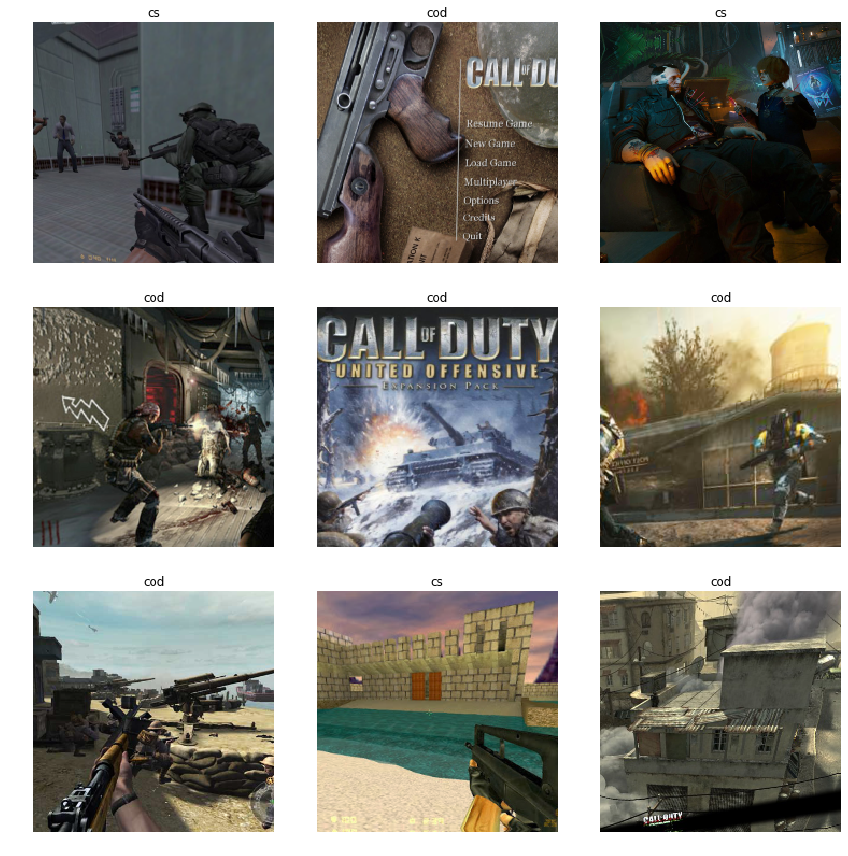

In [19]:
data.show_batch(rows = 3)

In [20]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

In [22]:
learn.fit_one_cycle(4)

In [23]:
learn.save('v01')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

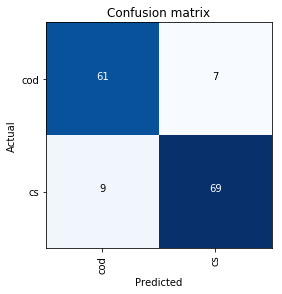

In [26]:
interp.plot_confusion_matrix()

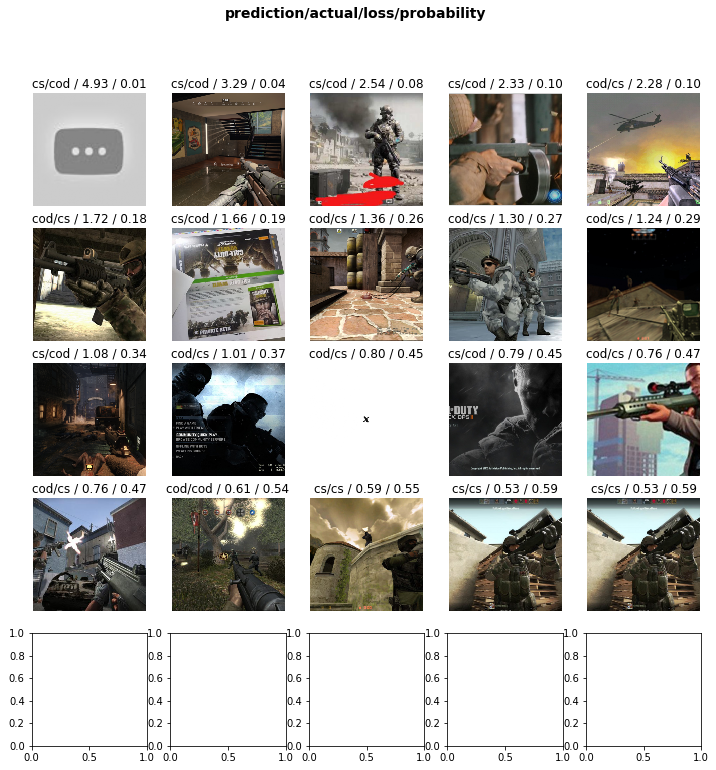

In [29]:
interp.plot_top_losses(20)

In [31]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [32]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [33]:
learn.fit_one_cycle(4)

In [34]:
learn.unfreeze()

In [40]:
doc(learn.unfreeze)

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


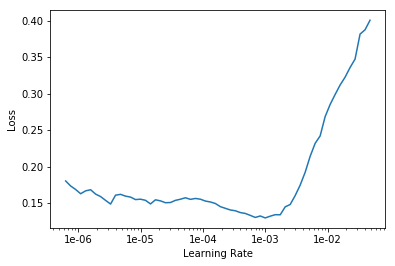

In [42]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-4))